## Импортируем необходимые бибилиотеки

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Создадим связь с базой данных

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

## Сделаем запрос к базе данных

In [3]:
query = """
SELECT uid, numTrials, timestamp
FROM checker
WHERE uid LIKE "user_%"
    AND status='ready'
    AND labname='project1'
ORDER BY CAST(uid AS binary), timestamp;
"""
df = pd.read_sql(query, conn, parse_dates=['timestamp']) # Выделим даты, сохранив информацию о времени, так точнее, чем делать это в запросе
df.sort_values(by='timestamp')

,uid,numTrials,timestamp
0,user_4,1,2020-04-17 05:19:02.744528
1,user_4,2,2020-04-17 05:22:45.549397
2,user_4,3,2020-04-17 05:34:24.422370
3,user_4,4,2020-04-17 05:43:27.773992
4,user_4,5,2020-04-17 05:46:32.275104
...,...,...,...
946,user_19,26,2020-05-15 10:22:39.698523
947,user_19,27,2020-05-15 10:22:46.248162
948,user_19,28,2020-05-15 10:23:18.043212
949,user_28,27,2020-05-15 10:38:14.430013


## Построим график

d:\Install\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Dynamic of commits per user in project1')

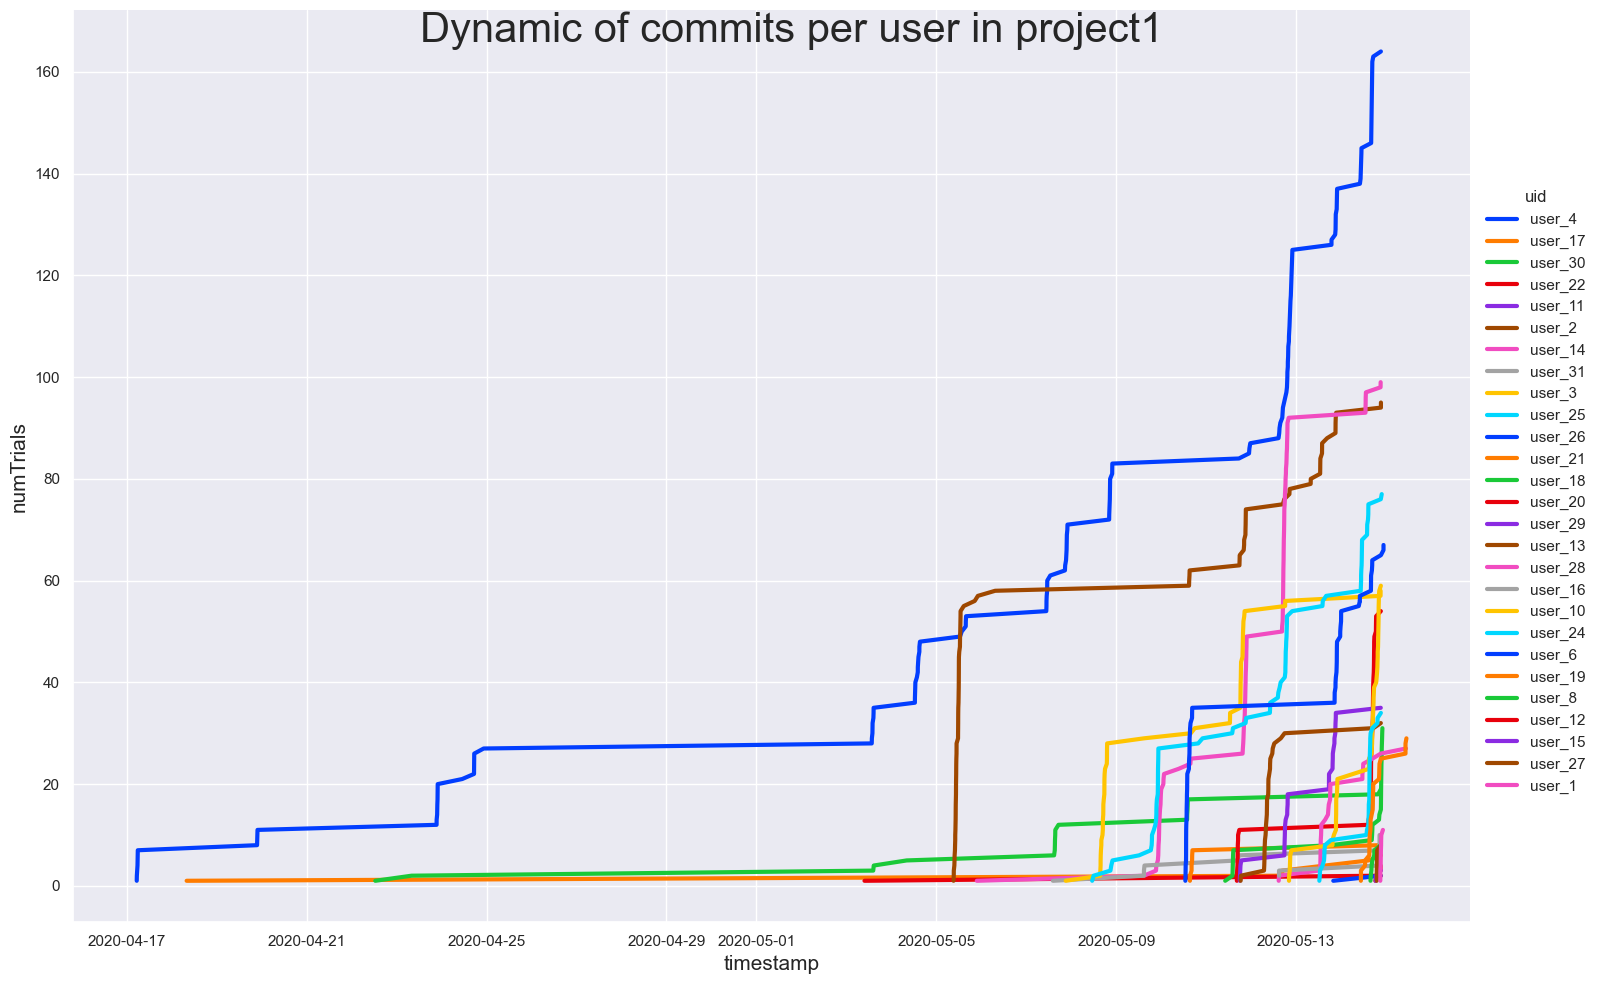

In [4]:
sns.set_theme(palette='dark',
        rc={'axes.labelsize': 15,
            'lines.linewidth': 3})
sns.relplot(data=df,
            palette="bright",
            x="timestamp",
            y="numTrials",
            hue="uid",
            height=10,
            aspect=1.5,
            kind="line",
            legend="full")
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)

## Вопросы, исходя из графика:

## Какой пользователь был лидером по количеству коммитов почти все время?
**Ответ:** user_4

## Какой пользователь был лидером в течение короткого периода времени?
**Ответ:** user_2

## Закроем связь с базой данных

In [5]:
conn.close()